In [108]:
# Imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [109]:
# Load the dataset
file_path = "/content/drive/MyDrive/Assignment 1/Assignment - 1-20241219T121054Z-001/Assignment - 1/WHR-2024-5CS037.csv"
data = pd.read_csv(file_path)

# 1. Display the first 10 rows
print("First 10 rows of the dataset:")
print(data.head(10))

# 2. Identify the number of rows and columns
num_rows, num_columns = data.shape
print(f"\nNumber of rows: {num_rows}")
print(f"Number of columns: {num_columns}")

# 3. List all columns and their data types
print("\nColumns and their data types:")
print(data.dtypes)


First 10 rows of the dataset:
  Country name  score  Log GDP per capita  Social support  \
0      Finland  7.741               1.844           1.572   
1      Denmark  7.583               1.908           1.520   
2      Iceland  7.525               1.881           1.617   
3       Sweden  7.344               1.878           1.501   
4       Israel  7.341               1.803           1.513   
5  Netherlands  7.319               1.901           1.462   
6       Norway  7.302               1.952           1.517   
7   Luxembourg  7.122               2.141           1.355   
8  Switzerland  7.060               1.970           1.425   
9    Australia  7.057               1.854           1.461   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
0                    0.695                         0.859       0.142   
1                    0.699                         0.823       0.204   
2                    0.718                         0.819       0.258   
3         

In [110]:
# Basic Statistics

# 1. Calculate the mean, median, and standard deviation for the Score column
mean_score = data['score'].mean()
median_score = data['score'].median()
std_dev_score = data['score'].std()

print("\nBasic Statistics for the Score column:")
print(f"Mean: {mean_score}")
print(f"Median: {median_score}")
print(f"Standard Deviation: {std_dev_score}")

# 2. Identify the country with the highest and lowest happiness scores
max_score_country = data.loc[data['score'].idxmax(), 'Country name']
min_score_country = data.loc[data['score'].idxmin(), 'Country name']

max_score = data['score'].max()
min_score = data['score'].min()

print("\nCountry with the highest happiness score:")
print(f"{max_score_country} (score: {max_score})")

print("\nCountry with the lowest happiness score:")
print(f"{min_score_country} (score: {min_score})")



Basic Statistics for the Score column:
Mean: 5.52758041958042
Median: 5.785
Standard Deviation: 1.1707165099442995

Country with the highest happiness score:
Finland (score: 7.741)

Country with the lowest happiness score:
Afghanistan (score: 1.721)


In [111]:
# Check for missing values in the dataset
# 1. Check if there are any missing values in the dataset. If so, display the total count for each column.
missing_values = data.isnull().sum()

print("\nMissing Values in the Dataset:")
print(missing_values)



Missing Values in the Dataset:
Country name                    0
score                           0
Log GDP per capita              3
Social support                  3
Healthy life expectancy         3
Freedom to make life choices    3
Generosity                      3
Perceptions of corruption       3
Dystopia + residual             3
dtype: int64


In [112]:
# Filtering and Sorting:
# 1. Filter the dataset to show only the countries with a Score greater than 7.5
filtered_data = data[data['score'] > 7.5]

print("\nCountries with a Score greater than 7.5:")
print(filtered_data)

# 2. Sort the dataset by GDP per Capita in descending order and display the top 10 rows
sorted_data = filtered_data.sort_values(by='Log GDP per capita', ascending=False)

print("\nTop 10 countries with Score > 7.5, sorted by GDP per Capita:")
print(sorted_data.head(10))



Countries with a Score greater than 7.5:
  Country name  score  Log GDP per capita  Social support  \
0      Finland  7.741               1.844           1.572   
1      Denmark  7.583               1.908           1.520   
2      Iceland  7.525               1.881           1.617   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
0                    0.695                         0.859       0.142   
1                    0.699                         0.823       0.204   
2                    0.718                         0.819       0.258   

   Perceptions of corruption  Dystopia + residual  
0                      0.546                2.082  
1                      0.548                1.881  
2                      0.182                2.050  

Top 10 countries with Score > 7.5, sorted by GDP per Capita:
  Country name  score  Log GDP per capita  Social support  \
1      Denmark  7.583               1.908           1.520   
2      Iceland  7.525           

In [113]:
# Adding New Columns:
# 1. Create a new column called Happiness Category that categorizes countries into three categories based on their Score:
#    Low − (Score < 4)
#    Medium − (4 ≤ Score ≤ 6)
#    High − (Score > 6)
def categorize_happiness(score):
    if score < 4:
        return 'Low'
    elif 4 <= score <= 6:
        return 'Medium'
    else:
        return 'High'

# Apply the function to create the new column
data['Happiness Category'] = data['score'].apply(categorize_happiness)

print("\nDataset with Happiness Category:")
print(data[['Country name', 'score', 'Happiness Category']])


Dataset with Happiness Category:
         Country name  score Happiness Category
0             Finland  7.741               High
1             Denmark  7.583               High
2             Iceland  7.525               High
3              Sweden  7.344               High
4              Israel  7.341               High
..                ...    ...                ...
138  Congo (Kinshasa)  3.295                Low
139      Sierra Leone  3.245                Low
140           Lesotho  3.186                Low
141           Lebanon  2.707                Low
142       Afghanistan  1.721                Low

[143 rows x 3 columns]


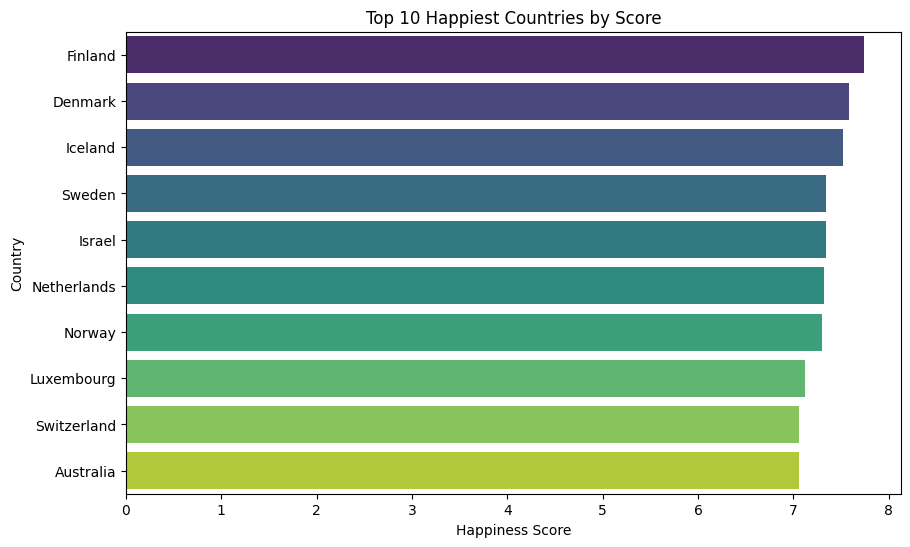

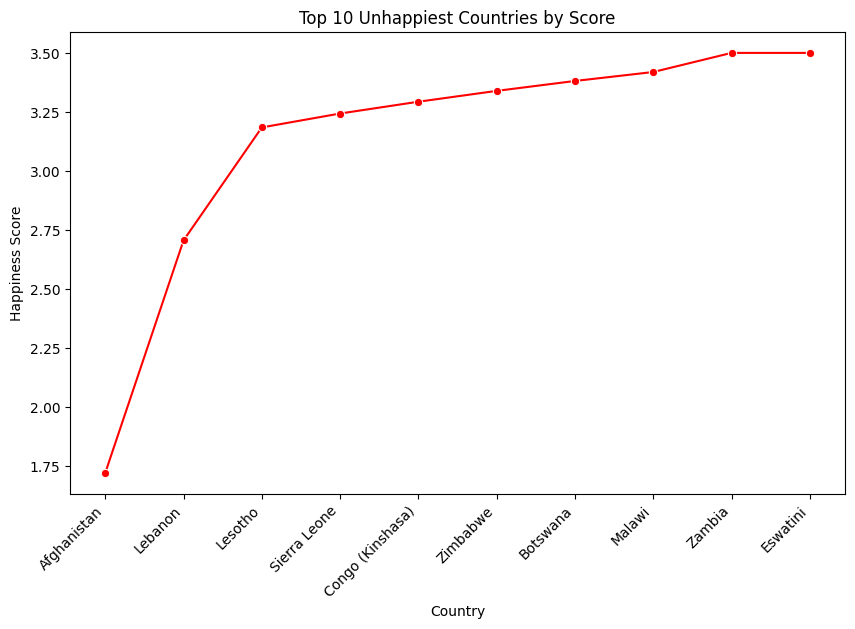

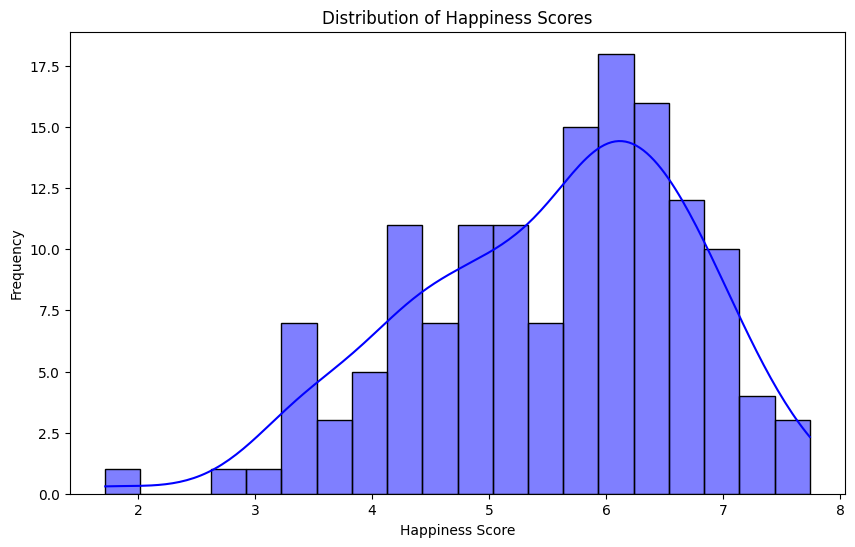

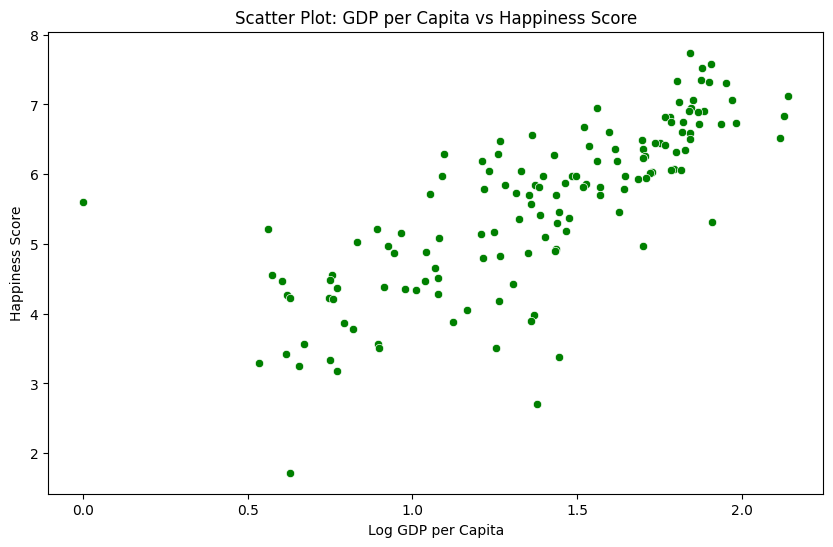

In [130]:
# 2. Data Visualizations:
# 1. Bar Plot: Top 10 happiest countries by Score
top_10_happiest = data.nlargest(10, 'score')

plt.figure(figsize=(10, 6))
sns.barplot(x='score', y='Country name', data=top_10_happiest, hue='Country name', palette='viridis')
plt.title('Top 10 Happiest Countries by Score')
plt.xlabel('Happiness Score')
plt.ylabel('Country')
plt.show()
print("\n")

# 2. Line Plot: Top 10 unhappiest countries by Score
top_10_unhappiest = data.nsmallest(10, 'score')
plt.figure(figsize=(10, 6))
sns.lineplot(x='Country name', y='score', data=top_10_unhappiest, marker='o', color='red')
plt.title('Top 10 Unhappiest Countries by Score')
plt.xlabel('Country')
plt.ylabel('Happiness Score')
plt.xticks(rotation=45, ha='right')  # Rotate country names for better readability
plt.show()
print("\n")
# 3. Histogram: Distribution of the Score column
plt.figure(figsize=(10, 6))
sns.histplot(data['score'], bins=20, kde=True, color='blue')
plt.title('Distribution of Happiness Scores')
plt.xlabel('Happiness Score')
plt.ylabel('Frequency')
plt.show()
print("\n")
# 4. Scatter Plot: Relationship between GDP per Capita and Score
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Log GDP per capita', y='score', data=data, color='green')
plt.title('Scatter Plot: GDP per Capita vs Happiness Score')
plt.xlabel('Log GDP per Capita')
plt.ylabel('Happiness Score')
plt.show()

In [115]:
# 3.2 Problem - 2 - Some Advance Data Exploration Task:
# Task - 1 - Setup Task - Preparing the South-Asia Dataset:
# Steps:
# 1. Define the countries in South Asia with a list for example:
# Step 1: Define the list of South Asian countries
south_asian_countries = ["Afghanistan", "Bangladesh", "Bhutan", "India",
                         "Maldives", "Nepal", "Pakistan", "Sri Lanka"]

# Step 2: Filter the dataset to include only South Asian countries
filtered_south_asia = data[data['Country name'].isin(south_asian_countries)]

# Step 3: Save the filtered dataframe to a new CSV file
filtered_south_asia.to_csv('filtered_south_asian_countries.csv', index=False)

print("\nFiltered dataset saved as 'filtered_south_asian_countries.csv'\n",filtered_south_asia.head())



Filtered dataset saved as 'filtered_south_asian_countries.csv'
     Country name  score  Log GDP per capita  Social support  \
92         Nepal  5.158               0.965           0.990   
107     Pakistan  4.657               1.069           0.600   
125        India  4.054               1.166           0.653   
127    Sri Lanka  3.898               1.361           1.179   
128   Bangladesh  3.886               1.122           0.249   

     Healthy life expectancy  Freedom to make life choices  Generosity  \
92                     0.443                         0.653       0.209   
107                    0.321                         0.542       0.144   
125                    0.417                         0.767       0.174   
127                    0.586                         0.583       0.144   
128                    0.513                         0.775       0.140   

     Perceptions of corruption  Dystopia + residual Happiness Category  
92                       0.115        

In [131]:
# Task - 2 - Composite Score Ranking:
# 1. Using the SouthAsia DataFrame, create a new column called Composite Score that combines the
# folowing metrics:
# Composite Score = 0.40 × GDP per Capita + 0.30 × Social Support + 0.30 × Healthy Life Expectancy
# Ensure you are working with a copy to avoid the warning
filtered_south_asia = filtered_south_asia.copy()
# Calculate the Composite Score using the given formula
filtered_south_asia['Composite Score'] = (0.40 *filtered_south_asia ['Log GDP per capita'] +
                                            0.30 *filtered_south_asia ['Social support'] +
                                            0.30 *filtered_south_asia ['Healthy life expectancy'])
# Display the updated DataFrame with the new Composite Score column
print(filtered_south_asia[['Country name', 'Log GDP per capita', 'Social support', 'Healthy life expectancy', 'Composite Score']])





    Country name  Log GDP per capita  Social support  Healthy life expectancy  \
127    Sri Lanka               1.361           1.179                    0.586   
92         Nepal               0.965           0.990                    0.443   
125        India               1.166           0.653                    0.417   
107     Pakistan               1.069           0.600                    0.321   
128   Bangladesh               1.122           0.249                    0.513   
142  Afghanistan               0.628           0.000                    0.242   

     Composite Score  
127           1.0739  
92            0.8159  
125           0.7874  
107           0.7039  
128           0.6774  
142           0.3238  


In [117]:
#2. Rank the countries based on the Composite Score in descending order
filtered_south_asia = filtered_south_asia.sort_values(by='Composite Score', ascending=False)

# # Display the top countries based on Composite Score
print("\nTop countries based on Composite Score:")
print(filtered_south_asia[['Country name', 'Composite Score']].head(10))




Top countries based on Composite Score:
    Country name  Composite Score
127    Sri Lanka           1.0739
92         Nepal           0.8159
125        India           0.7874
107     Pakistan           0.7039
128   Bangladesh           0.6774
142  Afghanistan           0.3238


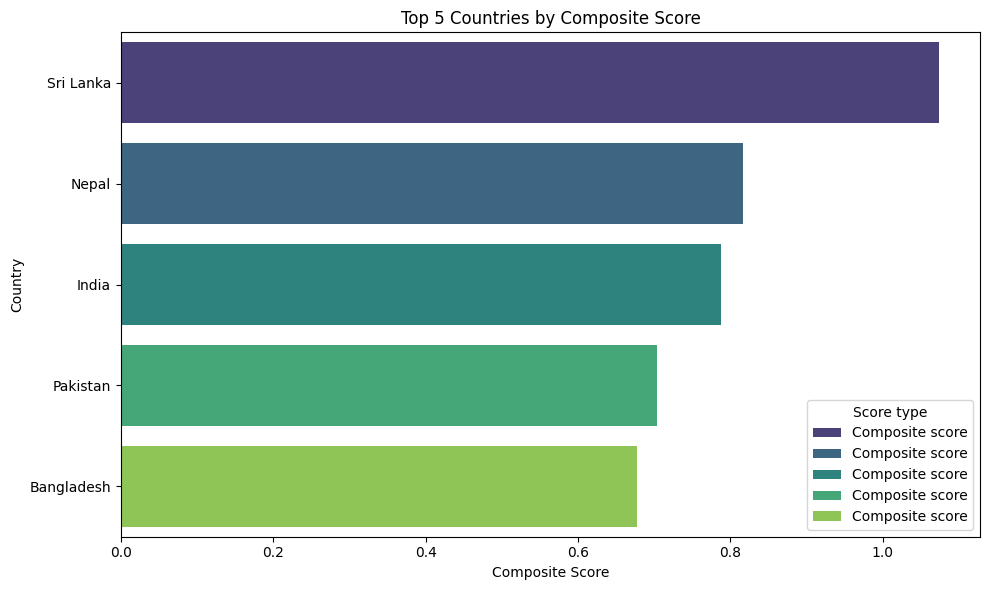

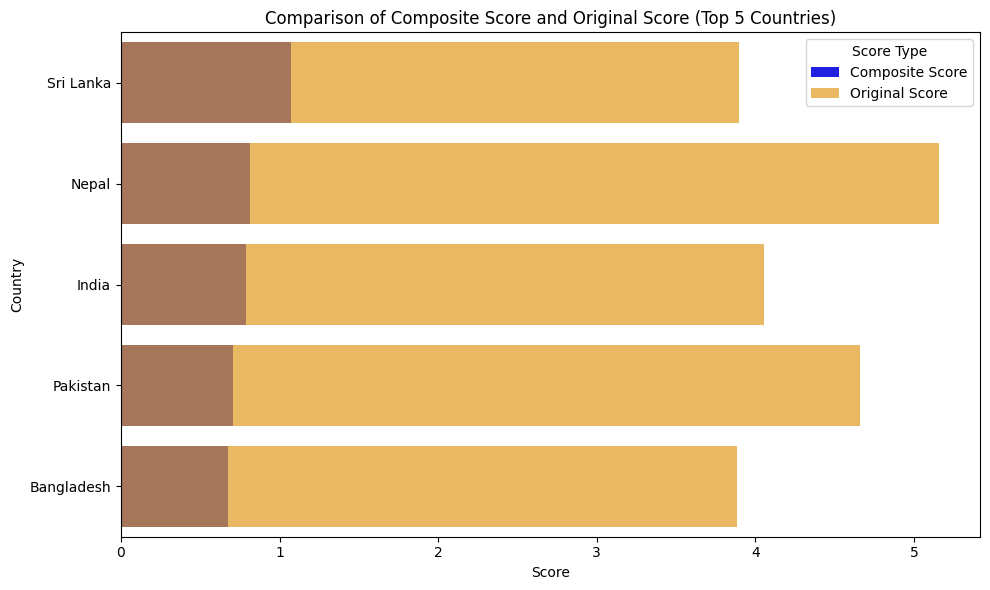

In [118]:

# 3. Visualize the top 5 countries using a horizontal bar chart showing the Composite Score.
top_5_composite_score = filtered_south_asia.sort_values(by='Composite Score', ascending=False).head(5)

plt.figure(figsize=(10, 6))
sns.barplot(x='Composite Score', y='Country name', data=top_5_composite_score, hue='Country name', dodge=False, palette='viridis',label='Composite score')
plt.title('Top 5 Countries by Composite Score')
plt.xlabel('Composite Score')
plt.ylabel('Country')
plt.tight_layout()
plt.legend(title='Score type')
plt.show()
print("\n")

# Discuss whether the rankings based on the Composite Score align with the original Score - support your
# discussion with some visualization plot.
plt.figure(figsize=(10, 6))
sns.barplot(x='Composite Score', y='Country name', data=top_5_composite_score, color='blue', label='Composite Score')
# Overlay Original Score
sns.barplot(x='score', y='Country name', data=top_5_composite_score, color='orange', alpha=0.7, label='Original Score')
# Add title and axis labels
plt.title('Comparison of Composite Score and Original Score (Top 5 Countries)')
plt.xlabel('Score')
plt.ylabel('Country')

# Add legend
plt.legend(title='Score Type', loc='best')

# Adjust layout and show plot
plt.tight_layout()
plt.show()





Outliers based on Score:
    Country name  score
142  Afghanistan  1.721

Outliers based on GDP per Capita:
    Country name  Log GDP per capita
142  Afghanistan               0.628


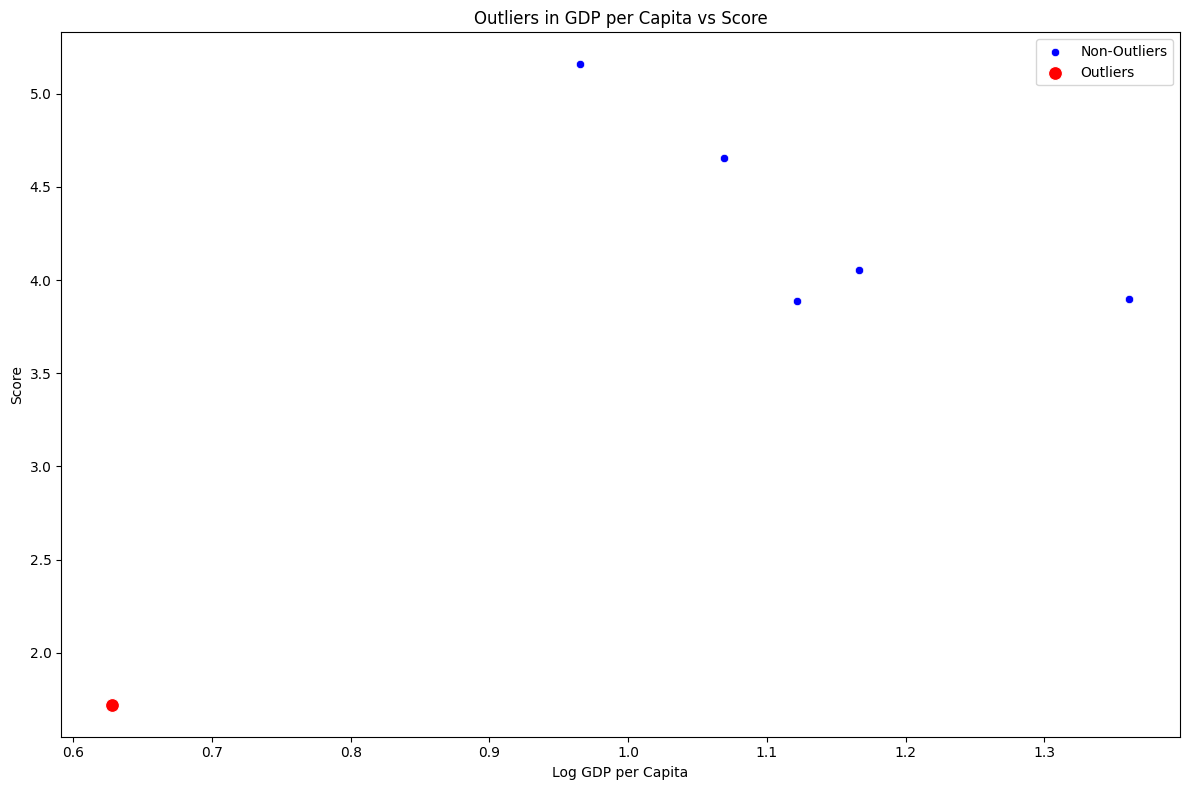

In [139]:
# Task - 3 - Outlier Detection
# 1.1. Identify outlier countries in South Asia based on their Score and GDP per Capita.
# 2.Define outliers using the 1.5 × IQR rule.
def detect_outliers(data, column):
    Q1 = data[column].quantile(0.25)  # First quartile (25%)
    Q3 = data[column].quantile(0.75)  # Third quartile (75%)
    IQR = Q3 - Q1  # Interquartile range
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] < lower_bound) | (data[column] > upper_bound)], lower_bound, upper_bound

outliers_score, lower_score, upper_score = detect_outliers(filtered_south_asia, 'score')
outliers_gdp, lower_gdp, upper_gdp = detect_outliers(filtered_south_asia, 'Log GDP per capita')

# Combine the outliers for visualization
outliers = pd.concat([outliers_score, outliers_gdp]).drop_duplicates()

print("\nOutliers based on Score:")
print(outliers_score[['Country name', 'score']])

print("\nOutliers based on GDP per Capita:")
print(outliers_gdp[['Country name', 'Log GDP per capita']])

# 3.Create a scatter plot with GDP per Capita on the x-axis and Score on the y-axis, highlighting outliers
# in a different color.

plt.figure(figsize=(12, 8))
sns.scatterplot(x='Log GDP per capita', y='score', data=filtered_south_asia, label='Non-Outliers', color='blue')
sns.scatterplot(x='Log GDP per capita', y='score', data=outliers, label='Outliers', color='red', marker='o', s=100)

plt.title('Outliers in GDP per Capita vs Score')
plt.xlabel('Log GDP per Capita')
plt.ylabel('Score')
plt.legend()
plt.tight_layout()
plt.show()



Pearson Correlation between Freedom to Make Life Choices and Score: 0.8005185224163315
Pearson Correlation between Generosity and Score: 0.874512371253192


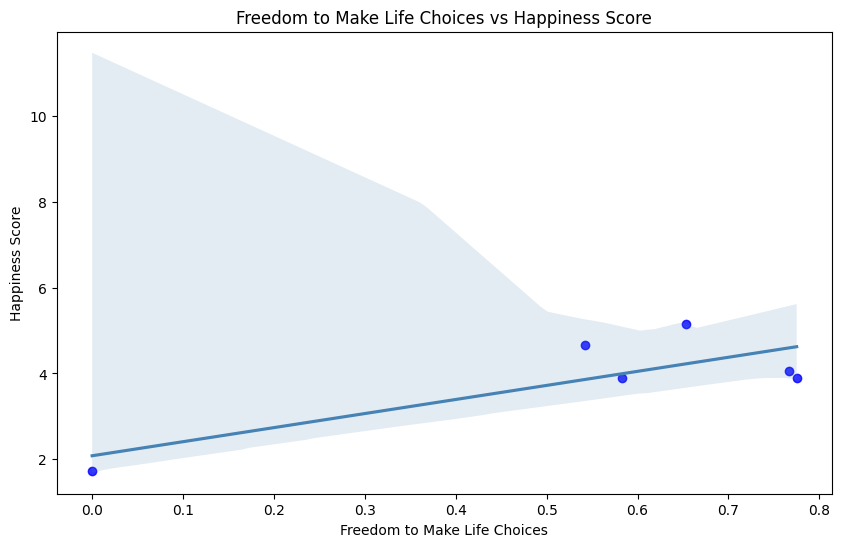

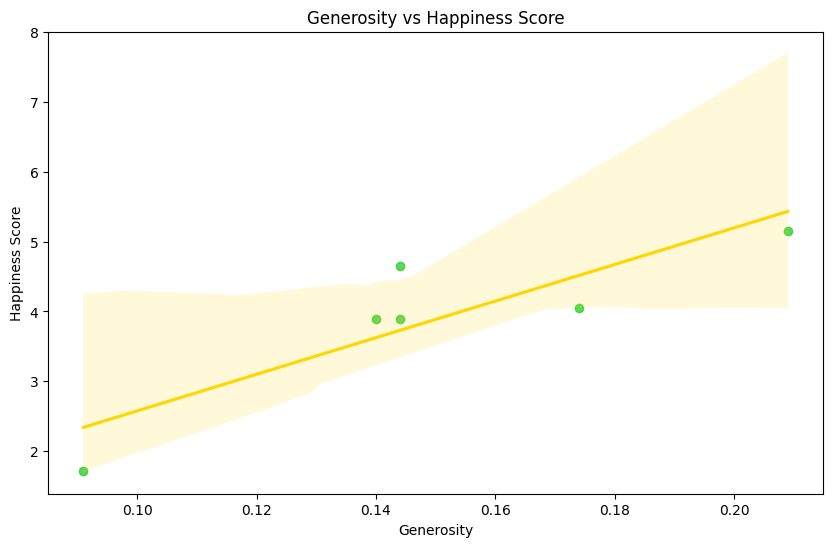

In [132]:
#  Task - 4 - Exploring Trends Across Metrics:
# 1. Choose two metrics (e.g., Freedom to Make Life Choices and Generosity) and calculate their correlation
# {pearson correlation} with the Score for South Asian countries.


corr_freedom_score = filtered_south_asia['score'].corr(filtered_south_asia['Freedom to make life choices'])
corr_generosity_score = filtered_south_asia['score'].corr(filtered_south_asia['Generosity'])

print(f"Pearson Correlation between Freedom to Make Life Choices and Score: {corr_freedom_score}")
print(f"Pearson Correlation between Generosity and Score: {corr_generosity_score}")

# # 2. Create scatter plots with trendlines for these metrics against the Score.
plt.figure(figsize=(10, 6))
sns.regplot(x='Freedom to make life choices', y='score', data=filtered_south_asia, scatter_kws={'color': 'blue'}, line_kws={'color': '#4682B4'})
plt.title('Freedom to Make Life Choices vs Happiness Score')
plt.xlabel('Freedom to Make Life Choices')
plt.ylabel('Happiness Score')
plt.show()
print("\n")
# Scatter Plot for Generosity vs Score
plt.figure(figsize=(10, 6))
sns.regplot(x='Generosity', y='score', data=filtered_south_asia, scatter_kws={'color': '#32CD32'}, line_kws={'color': '#FFD700'})
plt.title('Generosity vs Happiness Score')
plt.xlabel('Generosity')
plt.ylabel('Happiness Score')
plt.show()



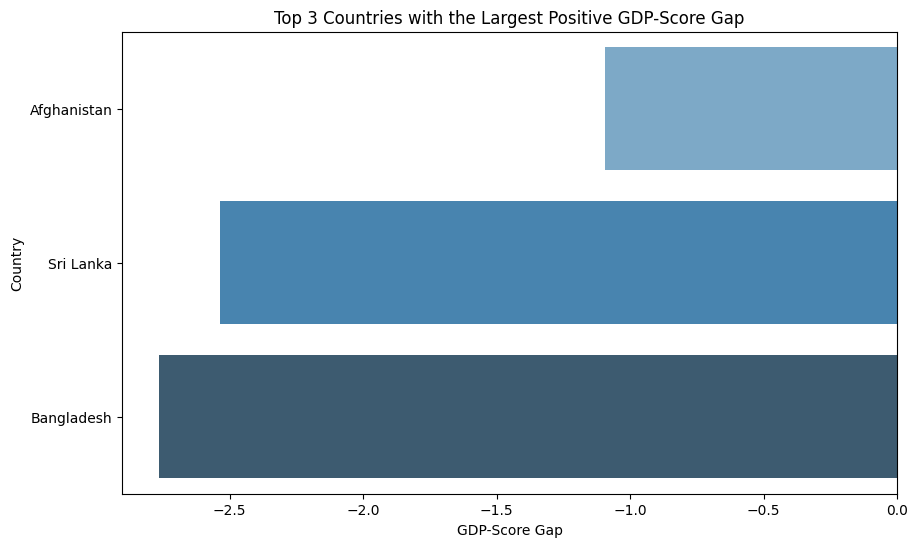

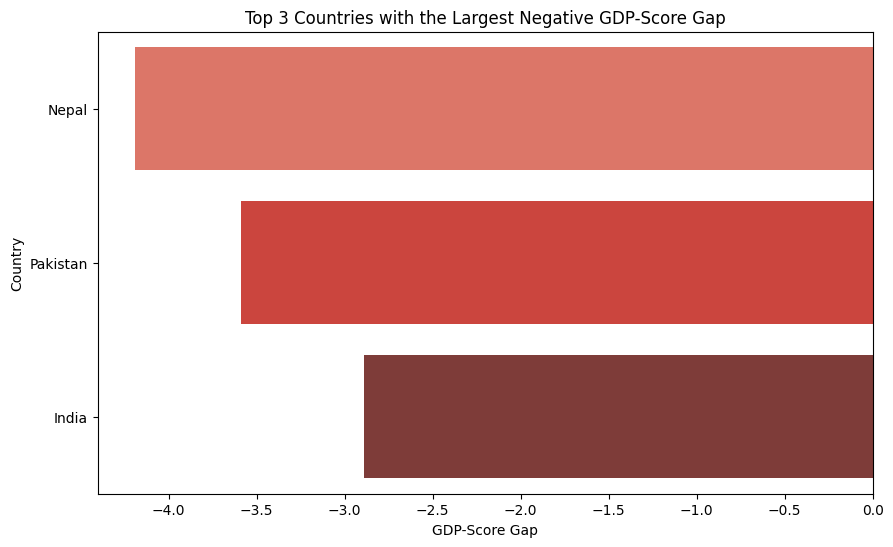

In [137]:
# Task - 5 - Gap Analysis:
# 1. Add a new column, GDP-Score Gap, which is the difference between GDP per Capita and the Score
# for each South Asian country.
filtered_south_asia['GDP-Score Gap'] = filtered_south_asia['Log GDP per capita'] - filtered_south_asia['score']

# 2. Rank the South Asian countries by this gap in both ascending and descending order.
#  Rank countries by GDP-Score Gap in ascending order
ascending_gap = filtered_south_asia.sort_values(by='GDP-Score Gap', ascending=True)

# Rank countries by GDP-Score Gap in descending order (largest gap)
descending_gap = filtered_south_asia.sort_values(by='GDP-Score Gap', ascending=False)

# 3. Highlight the top 3 countries with the largest positive and negative GDP-Score gaps
top_3_positive_gap = descending_gap.head(3)
top_3_negative_gap = ascending_gap.head(3)
# Step 3.1: Bar Chart for Top 3 Countries with the Largest Positive GDP-Score Gap
plt.figure(figsize=(10, 6))
sns.barplot(x='GDP-Score Gap', y='Country name', data=top_3_positive_gap, hue='Country name', palette='Blues_d')
plt.title('Top 3 Countries with the Largest Positive GDP-Score Gap')
plt.xlabel('GDP-Score Gap')
plt.ylabel('Country')
plt.show()
print("\n")

# Step 3.2: Bar Chart for Top 3 Countries with the Largest Negative GDP-Score Gap
plt.figure(figsize=(10, 6))
sns.barplot(x='GDP-Score Gap', y='Country name', data=top_3_negative_gap, hue='Country name', palette='Reds_d')
plt.title('Top 3 Countries with the Largest Negative GDP-Score Gap')
plt.xlabel('GDP-Score Gap')
plt.ylabel('Country')
plt.show()






In [122]:
# 3.3 Problem - 3 - Comparative Analysis:
# Task - 1 - Setup Task - Preparing the Middle Eastern Dataset:
# Tasks:
# 1. Similar in Task - 1 of Problem 2 create a dataframe from middle eastern countries. For hint use the
# following list:
# middle east countries = [ "Bahrain", "Iran", "Iraq", "Israel", "Jordan","Kuwait", "Lebanon", "Oman", "Palestine", "Qatar", "Saudi Arabia", "Syria","United Arab Emirates", "Yemen"]

# Step 1: Define the list of Middle Eastern countries
middle_eastern_countries = ["Bahrain", "Iran", "Iraq", "Israel", "Jordan",
                            "Kuwait", "Lebanon", "Oman", "Palestine", "Qatar",
                            "Saudi Arabia", "Syria", "United Arab Emirates", "Yemen"]

# Step 2: Filter the dataset to include only Middle Eastern countries
filtered_middle_east = data[data['Country name'].isin(middle_eastern_countries)]

# Step 3: Save the filtered dataset to a new CSV file
filtered_middle_east.to_csv('filtered_middle_eastern_countries.csv', index=False)
print(filtered_middle_east.head())


            Country name  score  Log GDP per capita  Social support  \
4                 Israel  7.341               1.803           1.513   
12                Kuwait  6.951               1.845           1.364   
21  United Arab Emirates  6.733               1.983           1.164   
27          Saudi Arabia  6.594               1.842           1.361   
61               Bahrain  5.959                 NaN             NaN   

    Healthy life expectancy  Freedom to make life choices  Generosity  \
4                     0.740                         0.641       0.153   
12                    0.661                         0.827       0.200   
21                    0.563                         0.815       0.209   
27                    0.511                         0.787       0.114   
61                      NaN                           NaN         NaN   

    Perceptions of corruption  Dystopia + residual Happiness Category  
4                       0.193                2.298            

In [123]:
# 1. Descriptive Statistics:
# • Calculate the mean, Standard deviation of the score for both South Asia and Middle East.

mean_score_sa = filtered_south_asia['score'].mean()
std_dev_score_sa = filtered_south_asia['score'].std()

mean_score_me = filtered_middle_east['score'].mean()
std_dev_score_me = filtered_middle_east['score'].std()

print(f"South Asia - Mean Score: {mean_score_sa}, Standard Deviation: {std_dev_score_sa}")
print(f"Middle East - Mean Score: {mean_score_me}, Standard Deviation: {std_dev_score_me}")

# • Which region has higher happiness Scores on average?

if mean_score_sa > mean_score_me:
    region_comparison = "South Asia has a higher average happiness score."
else:
    region_comparison = "Middle East has a higher average happiness score."
print(region_comparison)


South Asia - Mean Score: 3.895666666666667, Standard Deviation: 1.1770690152521501
Middle East - Mean Score: 5.412100000000001, Standard Deviation: 1.5662011684327144
Middle East has a higher average happiness score.


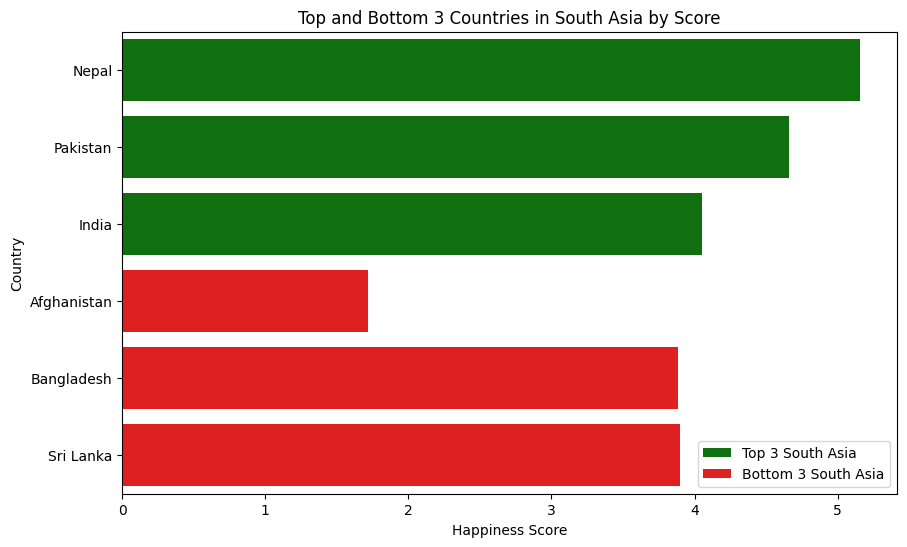

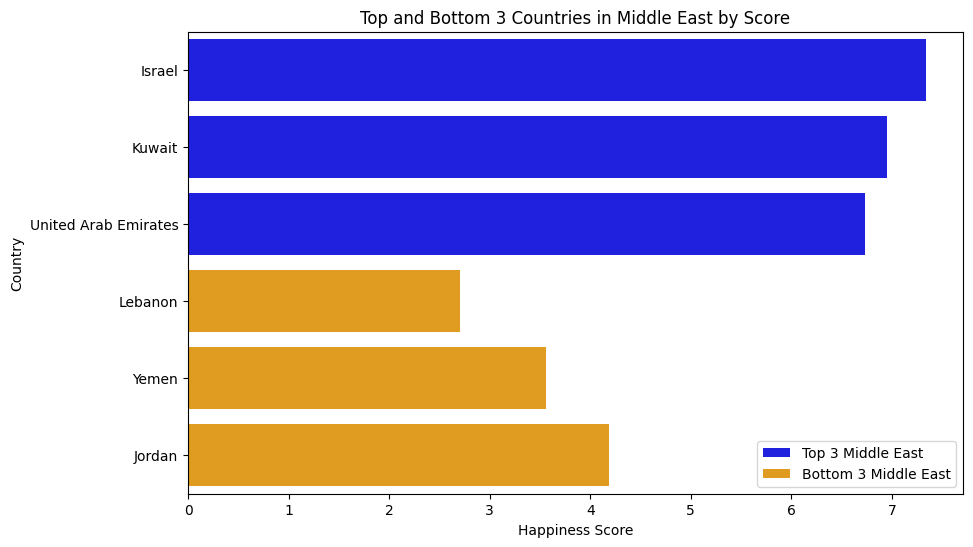

In [124]:
# 2. Top and Bottom Performers:
# • Identify the top 3 and bottom 3 countries in each region based on the score.

# Top 3 and Bottom 3 countries in South Asia based on score
top_3_sa = filtered_south_asia.nlargest(3, 'score')
bottom_3_sa = filtered_south_asia.nsmallest(3, 'score')

# Top 3 and Bottom 3 countries in Middle East based on score
top_3_me = filtered_middle_east.nlargest(3, 'score')
bottom_3_me = filtered_middle_east.nsmallest(3, 'score')

# • Plot bar charts comparing these charts.

# South Asia
plt.figure(figsize=(10, 6))
sns.barplot(x='score', y='Country name', data=top_3_sa, color='green', label='Top 3 South Asia')
sns.barplot(x='score', y='Country name', data=bottom_3_sa, color='red', label='Bottom 3 South Asia')
plt.title('Top and Bottom 3 Countries in South Asia by Score')
plt.xlabel('Happiness Score')
plt.ylabel('Country')
plt.legend()
plt.show()

# Middle East
plt.figure(figsize=(10, 6))
sns.barplot(x='score', y='Country name', data=top_3_me, color='blue', label='Top 3 Middle East')
sns.barplot(x='score', y='Country name', data=bottom_3_me, color='orange', label='Bottom 3 Middle East')
plt.title('Top and Bottom 3 Countries in Middle East by Score')
plt.xlabel('Happiness Score')
plt.ylabel('Country')
plt.legend()
plt.show()

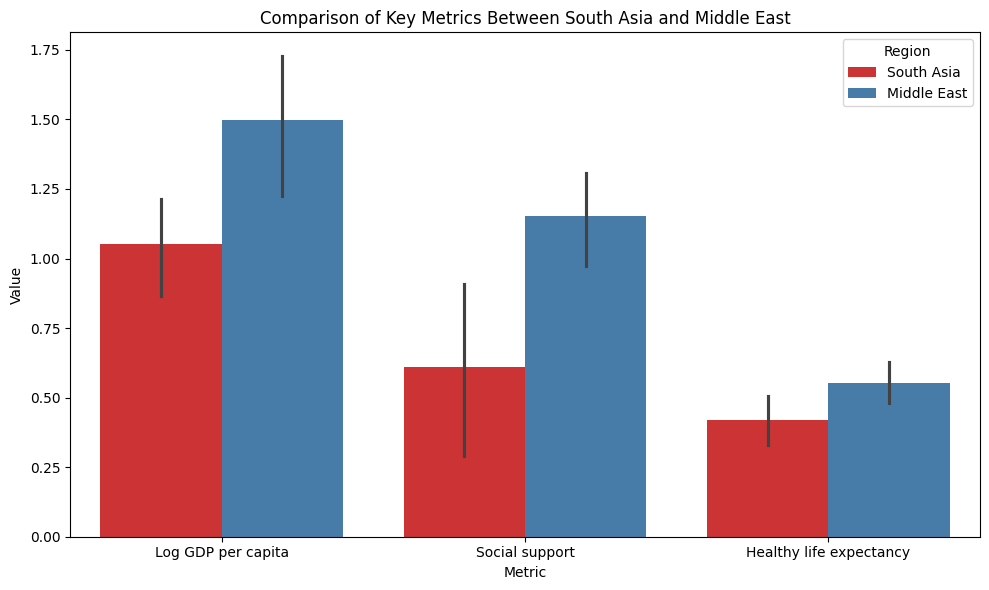

In [125]:

# 3. Metric Comparisons:

# • Compare key metrics like GDP per Capita, Social Support, and Healthy Life Expectancy between the regions using grouped bar charts.
metrics = ['Log GDP per capita', 'Social support', 'Healthy life expectancy']

south_asia_metrics = filtered_south_asia[['Country name'] + metrics].melt(id_vars='Country name', value_vars=metrics, var_name='Metric', value_name='Value')
middle_east_metrics = filtered_middle_east[['Country name'] + metrics].melt(id_vars='Country name', value_vars=metrics, var_name='Metric', value_name='Value')

south_asia_metrics['Region'] = 'South Asia'
middle_east_metrics['Region'] = 'Middle East'

comparison_df = pd.concat([south_asia_metrics, middle_east_metrics]).reset_index(drop=True)

plt.figure(figsize=(10, 6))
sns.barplot(x='Metric', y='Value', hue='Region', data=comparison_df, palette='Set1')

plt.title('Comparison of Key Metrics Between South Asia and Middle East')
plt.xlabel('Metric')
plt.ylabel('Value')
plt.tight_layout()
plt.show()


In [126]:
# 4. Happiness Disparity:
# • Compute the range (max - min) and coefficient of variation (CV) for Score in both regions.
south_asia_range = filtered_south_asia['score'].max() - filtered_south_asia['score'].min()
middle_east_range = filtered_middle_east['score'].max() - filtered_middle_east['score'].min()

# Compute the coefficient of variation (CV) for Score in both regions
south_asia_cv = filtered_south_asia['score'].std() / filtered_south_asia['score'].mean()
middle_east_cv = filtered_middle_east['score'].std() / filtered_middle_east['score'].mean()

# Display the results
print(f"South Asia - Range of Score: {south_asia_range}")
print(f"Middle East - Range of Score: {middle_east_range}\n")

print(f"South Asia - Coefficient of Variation (CV) of Score: {south_asia_cv:.4f}")
print(f"Middle East - Coefficient of Variation (CV) of Score: {middle_east_cv:.4f}\n")

# • Which region has greater variability in happiness?
if south_asia_cv > middle_east_cv:
    print("South Asia has greater variability in happiness.")
else:
    print("Middle East has greater variability in happiness.")


South Asia - Range of Score: 3.4370000000000003
Middle East - Range of Score: 4.634

South Asia - Coefficient of Variation (CV) of Score: 0.3021
Middle East - Coefficient of Variation (CV) of Score: 0.2894

South Asia has greater variability in happiness.


South Asia - Correlation between Score and Freedom to Make Life Choices: 0.80
South Asia - Correlation between Score and Generosity: 0.87
Middle East - Correlation between Score and Freedom to Make Life Choices: 0.86
Middle East - Correlation between Score and Generosity: 0.63


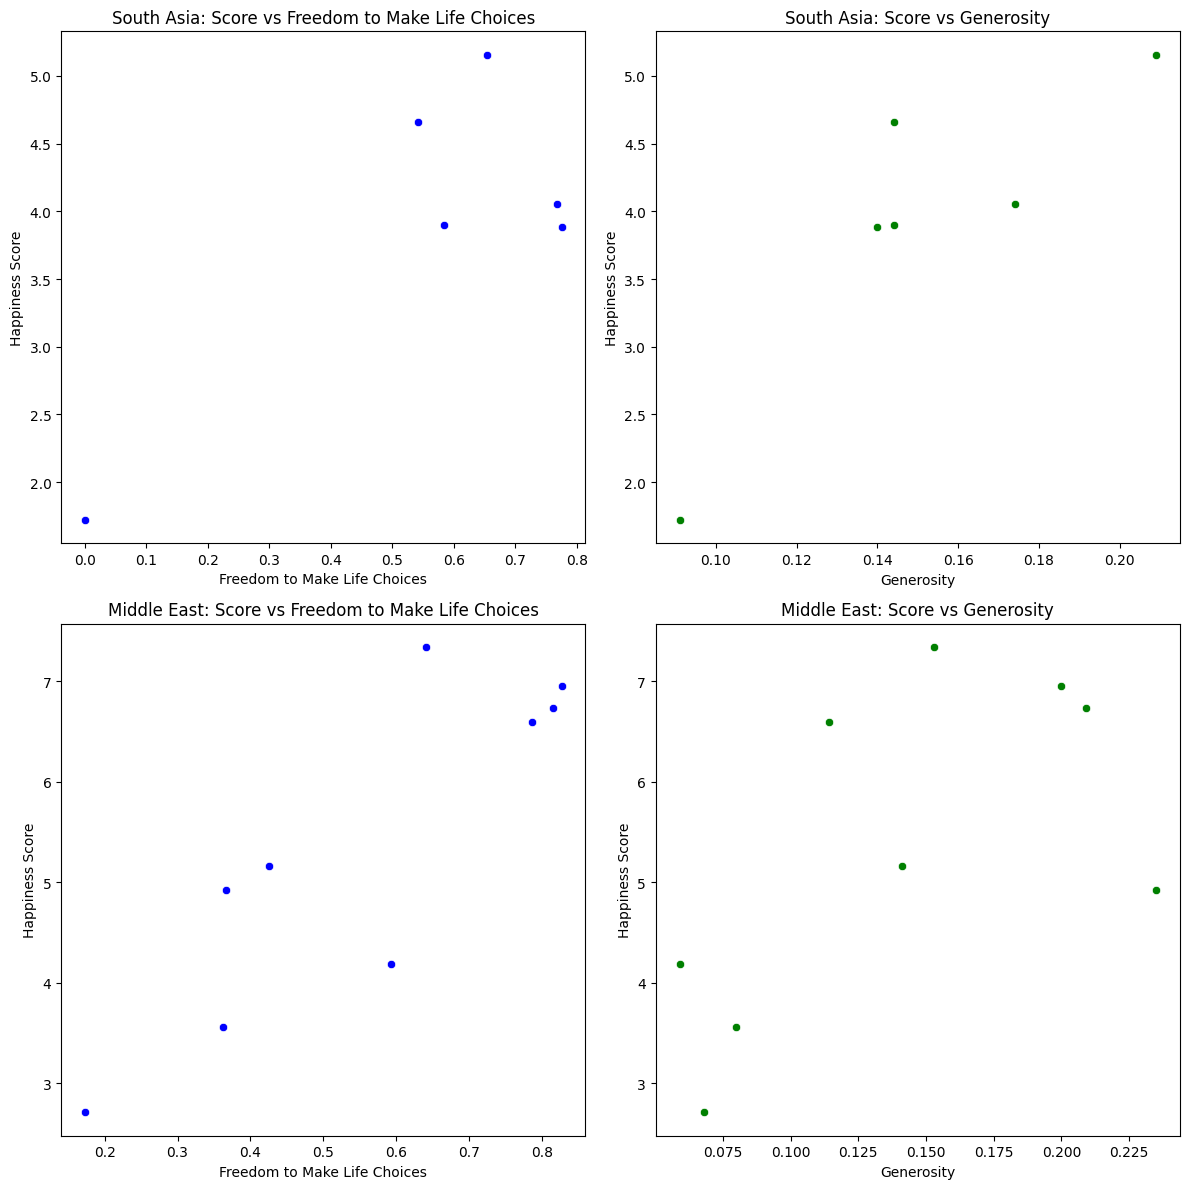

In [127]:
# 5. Correlation Analysis:
# • Analyze the correlation of Score with other metrics Freedom to Make Life Choices, and Generosity within each region.


# For South Asia
south_asia_corr_freedom = filtered_south_asia[['score', 'Freedom to make life choices']].corr().iloc[0, 1]
south_asia_corr_generosity = filtered_south_asia[['score', 'Generosity']].corr().iloc[0, 1]

# For Middle East
middle_east_corr_freedom = filtered_middle_east[['score', 'Freedom to make life choices']].corr().iloc[0, 1]
middle_east_corr_generosity = filtered_middle_east[['score', 'Generosity']].corr().iloc[0, 1]

# Display the correlation results
print(f"South Asia - Correlation between Score and Freedom to Make Life Choices: {south_asia_corr_freedom:.2f}")
print(f"South Asia - Correlation between Score and Generosity: {south_asia_corr_generosity:.2f}")

print(f"Middle East - Correlation between Score and Freedom to Make Life Choices: {middle_east_corr_freedom:.2f}")
print(f"Middle East - Correlation between Score and Generosity: {middle_east_corr_generosity:.2f}")

# • Create scatter plots to visualize and interpret the relationships.

# Create a figure for subplots
plt.figure(figsize=(12, 12))

# South Asia: Score vs Freedom to Make Life Choices
plt.subplot(2, 2, 1)
sns.scatterplot(x='Freedom to make life choices', y='score', data=filtered_south_asia, color='blue')
plt.title('South Asia: Score vs Freedom to Make Life Choices')
plt.xlabel('Freedom to Make Life Choices')
plt.ylabel('Happiness Score')

# South Asia: Score vs Generosity
plt.subplot(2, 2, 2)
sns.scatterplot(x='Generosity', y='score', data=filtered_south_asia, color='green')
plt.title('South Asia: Score vs Generosity')
plt.xlabel('Generosity')
plt.ylabel('Happiness Score')

# Middle East: Score vs Freedom to Make Life Choices
plt.subplot(2, 2, 3)
sns.scatterplot(x='Freedom to make life choices', y='score', data=filtered_middle_east, color='blue')
plt.title('Middle East: Score vs Freedom to Make Life Choices')
plt.xlabel('Freedom to Make Life Choices')
plt.ylabel('Happiness Score')

# Middle East: Score vs Generosity
plt.subplot(2, 2, 4)
sns.scatterplot(x='Generosity', y='score', data=filtered_middle_east, color='green')
plt.title('Middle East: Score vs Generosity')
plt.xlabel('Generosity')
plt.ylabel('Happiness Score')

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the plots
plt.show()



South Asia - Score Outliers:
     Country name  score
142  Afghanistan  1.721

South Asia - GDP Outliers:
     Country name  Log GDP per capita
142  Afghanistan               0.628

Middle East - Score Outliers:
 Empty DataFrame
Columns: [Country name, score]
Index: []

Middle East - GDP Outliers:
 Empty DataFrame
Columns: [Country name, Log GDP per capita]
Index: []


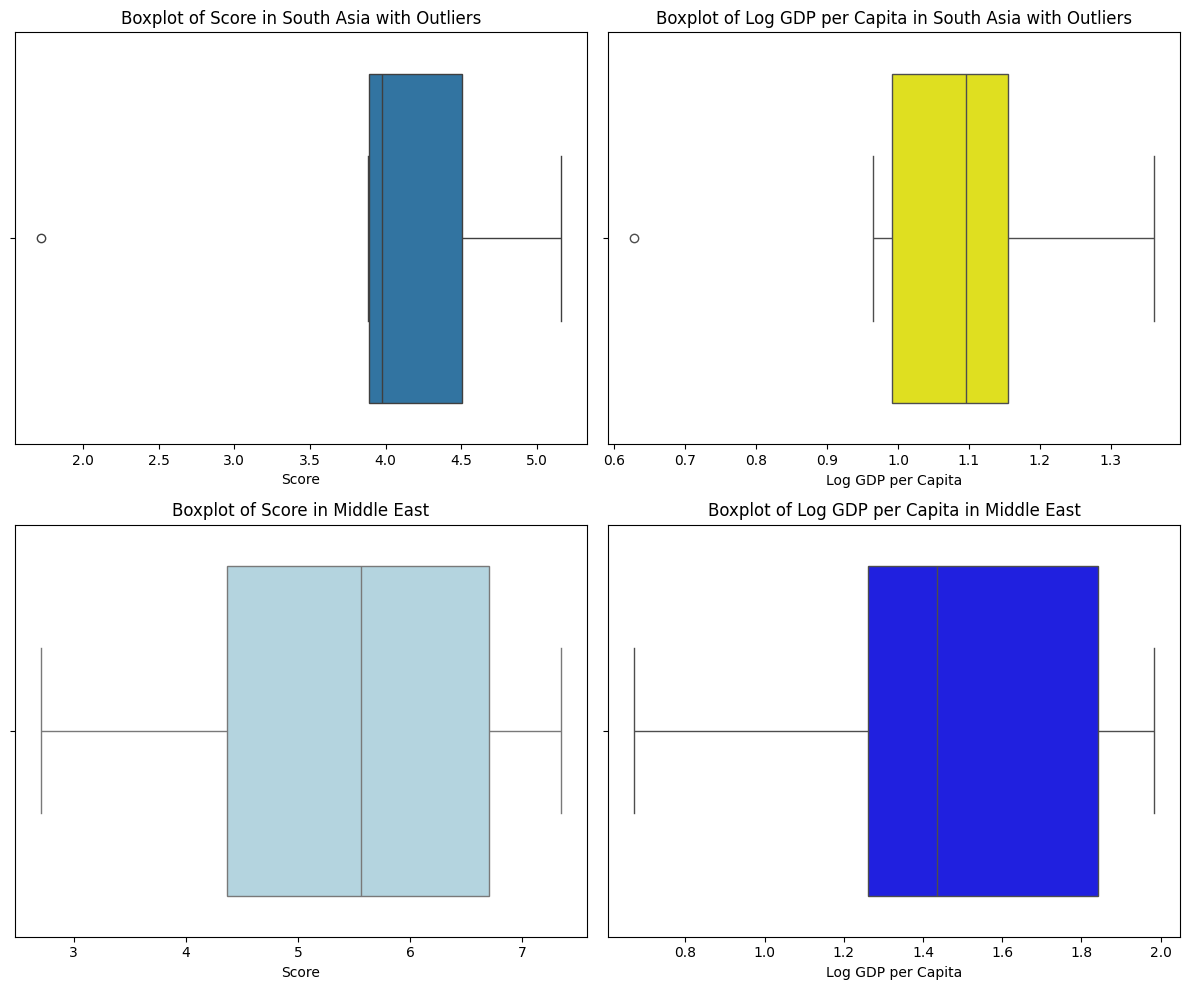

In [128]:
# 6. Outlier Detection:


# Identify outlier countries in both regions based on Score and GDP per Capita.
def identify_outliers(data, column):
    # Calculate Q1, Q3, and IQR
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1

    # Define lower and upper bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify outliers
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers

# Identify outliers for South Asia
SA_score_outliers = identify_outliers(filtered_south_asia, 'score')
SA_gdp_outliers = identify_outliers(filtered_south_asia, 'Log GDP per capita')

# Identify outliers for Middle East
ME_score_outliers = identify_outliers(filtered_middle_east, 'score')
ME_gdp_outliers = identify_outliers(filtered_middle_east, 'Log GDP per capita')

# Display results
print("South Asia - Score Outliers:\n", SA_score_outliers[['Country name', 'score']])
print("\nSouth Asia - GDP Outliers:\n", SA_gdp_outliers[['Country name', 'Log GDP per capita']])
print("\nMiddle East - Score Outliers:\n", ME_score_outliers[['Country name', 'score']])
print("\nMiddle East - GDP Outliers:\n", ME_gdp_outliers[['Country name', 'Log GDP per capita']])




# Create a figure for subplots
plt.figure(figsize=(12, 10))

# South Asia Score
plt.subplot(2, 2, 1)
sns.boxplot(x=filtered_south_asia['score'])
plt.title('Boxplot of Score in South Asia with Outliers')
plt.xlabel('Score')

# South Asia Log GDP per Capita
plt.subplot(2, 2, 2)
sns.boxplot(x=filtered_south_asia['Log GDP per capita'], color='yellow')
plt.title('Boxplot of Log GDP per Capita in South Asia with Outliers')
plt.xlabel('Log GDP per Capita')

# Middle East Score
plt.subplot(2, 2, 3)
sns.boxplot(x=filtered_middle_east['score'], color='lightblue')
plt.title('Boxplot of Score in Middle East')
plt.xlabel('Score')

# Middle East Log GDP per Capita
plt.subplot(2, 2, 4)
sns.boxplot(x=filtered_middle_east['Log GDP per capita'], color='blue')
plt.title('Boxplot of Log GDP per Capita in Middle East')
plt.xlabel('Log GDP per Capita')

plt.tight_layout()

# Display plots
plt.show()

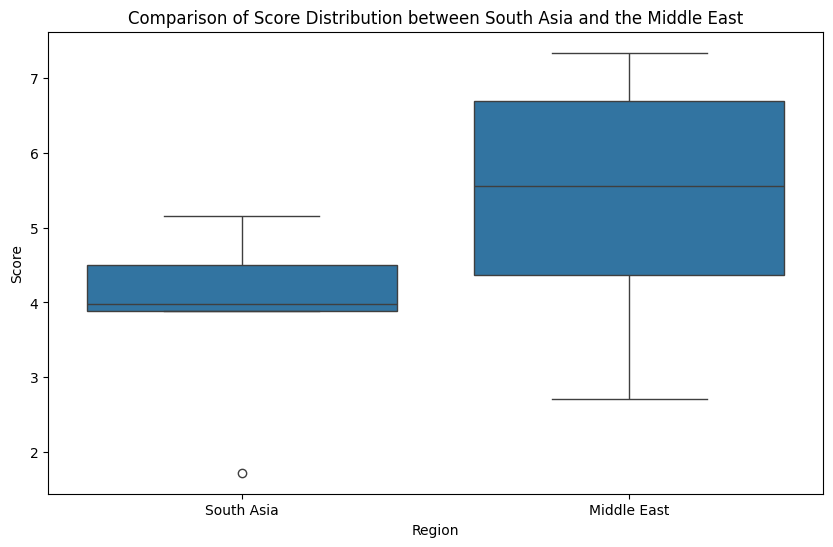

In [138]:
# 7. Visualization:
# • Create boxplots comparing the distribution of Score between South Asia and the Middle East.

# Make sure you are working on a copy to avoid the warning
filtered_south_asia = filtered_south_asia.copy()
filtered_middle_east = filtered_middle_east.copy()

# Assign 'South Asia' and 'Middle East' to the 'Region' column using .loc[] for both DataFrames
filtered_south_asia.loc[:, 'Region'] = 'South Asia'
filtered_middle_east.loc[:, 'Region'] = 'Middle East'

# Combine the two dataframes into one for comparison
combined_df = pd.concat([filtered_south_asia[['score', 'Region']], filtered_middle_east[['score', 'Region']]])
plt.figure(figsize=(10, 6))
sns.boxplot(x='Region', y='score', data=combined_df)
plt.title('Comparison of Score Distribution between South Asia and the Middle East')
plt.xlabel('Region')
plt.ylabel('Score')
plt.show()
